In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
%%html
<style>
.cell-output-ipywidget-background {
    background-color: transparent !important;
}
:root {
    --jp-widgets-color: var(--vscode-editor-foreground);
    --jp-widgets-font-size: var(--vscode-editor-font-size);
}  
</style>

$ vllm serve NousResearch/Hermes-2-Theta-Llama-3-8B --block-size=32 --disable-log-requests --enable-chunked-prefill --enable-prefix-caching --enforce-eager --gpu-memory-utilization=0.95 --max-num-seqs=2048 --max-num-batched-tokens=16384 --num-scheduler-steps=8 --preemption-mode=swap --return-tokens-as-token-ids --swap-space=80 --tensor-parallel-size=1 --tool-call-parser=hermes --served-model-name=temporal-clue-001 --port=8000 --api-key=default


Loading safetensors checkpoint shards:   0% Completed | 0/4 [00:00<?, ?it/s]
Loading safetensors checkpoint shards:  25% Completed | 1/4 [00:01<00:03,  1.03s/it]
Loading safetensors checkpoint shards:  50% Completed | 2/4 [00:02<00:02,  1.05s/it]
Loading safetensors checkpoint shards:  75% Completed | 3/4 [00:03<00:01,  1.02s/it]
Loading safetensors checkpoint shards: 100% Completed | 4/4 [00:03<00:00,  1.36it/s]
Loading safetensors checkpoint shards: 100% Completed | 4/4 [00:03<00:00,  1.19it/s]

INFO:     Started server process [59963]
INFO:     Waiting for application startup.
INFO:     Application startup complete.


INFO:     127.0.0.1:55116 - "POST /v1/chat/completions HTTP/1.1" 200 OK
vLLM server started succesfully. Logs can be found at ./logs/vllm.log
Using previous iteration 1455.48125 completion tokens per request as estimate


val:   0%|          | 0/128 [00:00<?, ?it/s]

train:   0%|          | 0/160 [00:00<?, ?it/s]

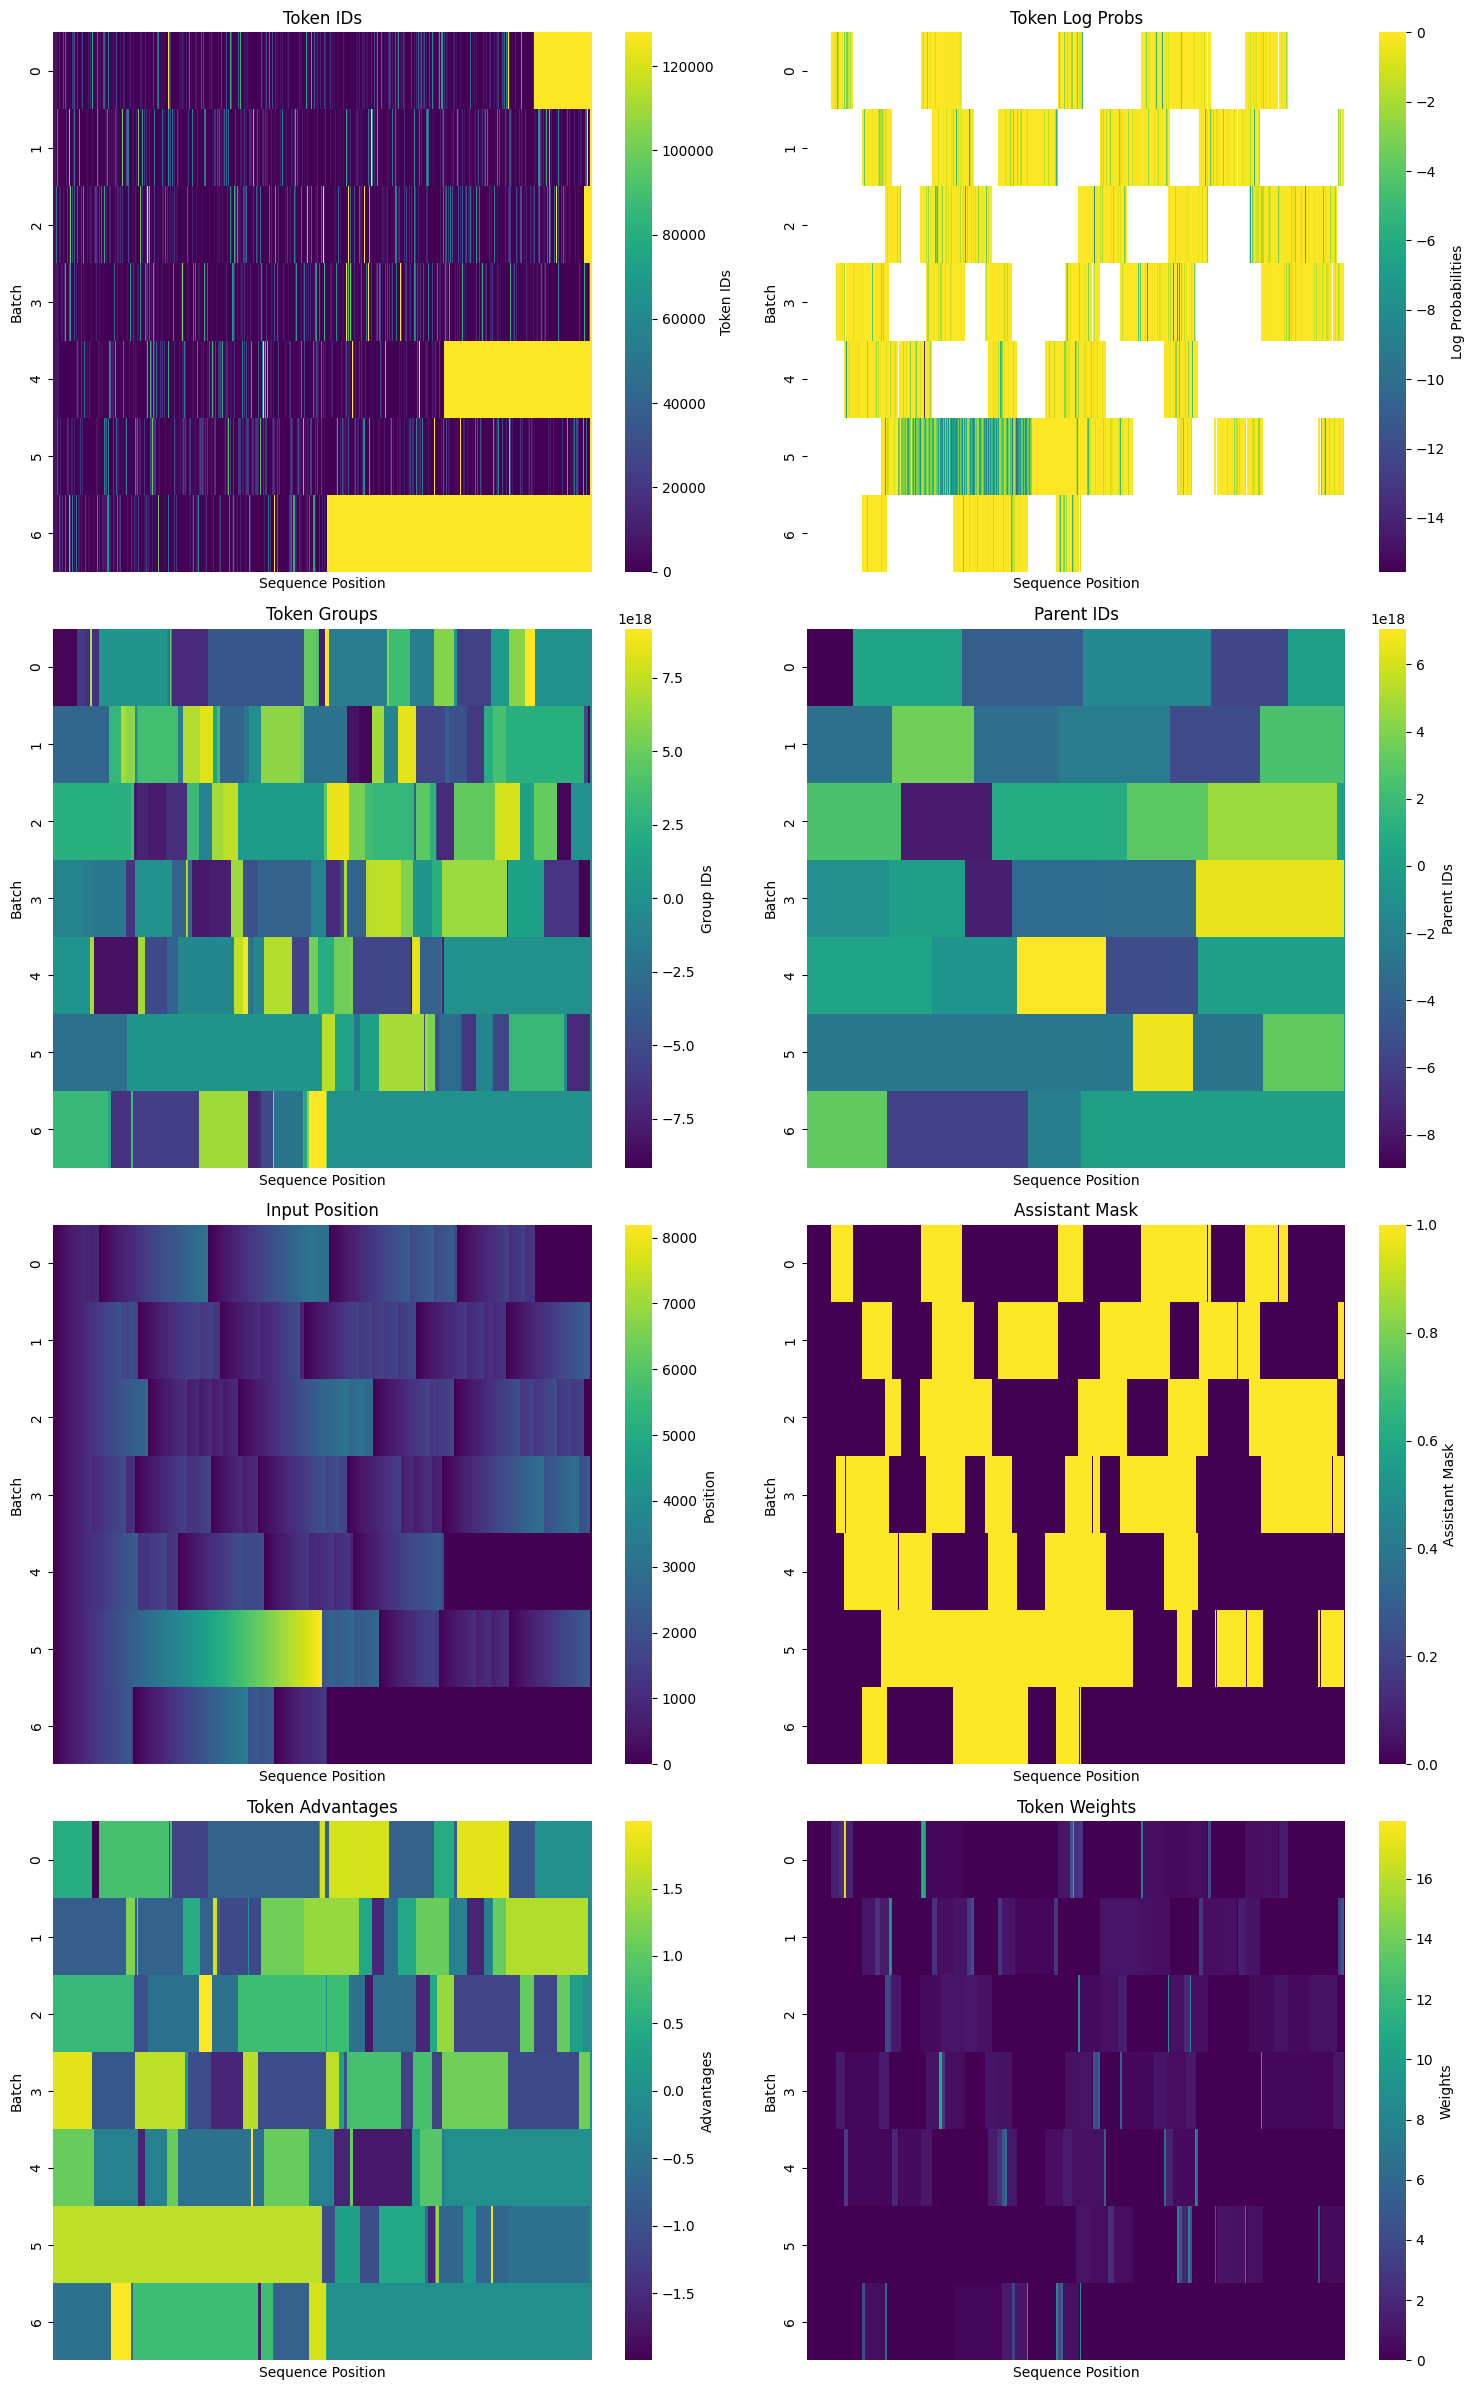

$ tune run art.local.recipe.TuneRecipe --config ./.art/models/temporal-clue-001/config.yaml
🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!


<frozen runpy>:128: RuntimeWarning: 'art.local.recipe' found in sys.modules after import of package 'art.local', but prior to execution of 'art.local.recipe'; this may result in unpredictable behaviour
Training is not distributed. If you want to train on multiple GPUs and are using the tune CLI, specify --nnodes 1 and --nproc_per_node [num_gpus]
Set intra op parallelism no. of threads to 160
Running FullFinetuneRecipe with resolved config:

batch_size: 2
checkpointer:
  _component_: torchtune.training.checkpointing._checkpointer.FullModelHFCheckpointer
  checkpoint_dir: /workspace/hf_home/hub/models--NousResearch--Hermes-2-Theta-Llama-3-8B/snapshots/57a73110702e7b05ba3f39fef36297454c680725
  checkpoint_files:
  - model-00001-of-00004.safetensors
  - model-00002-of-00004.safetensors
  - model-00003-of-00004.safetensors
  - model-00004-of-00004.safetensors
  model_type: LLAMA3
  output_dir: ./.art/models/temporal-clue-001
  recipe_checkpoint: null
compile: true
custom_sharded_layers:
- t

Writing logs to .art/models/temporal-clue-001/logs/log_1743032388.txt


FSDP is enabled. Instantiating model and loading checkpoint on Rank 0 ...
Compiling model layers with torch.compile...
Instantiating model and loading checkpoint took 3.55 secs
Memory stats after model init:
	GPU peak memory allocation: 15.03 GiB
	GPU peak memory reserved: 15.04 GiB
	GPU peak memory active: 15.03 GiB
Optimizer is initialized.
Compiling loss with torch.compile...
Loss is initialized.
Dataset and Sampler are initialized.
 Profiling disabled.
 Profiler config after instantiation: {'enabled': False}
1|3|Loss: 0.0709: 100%|██████████| 3/3 [01:08<00:00, 19.83s/it, loss=0.0709, policy=0.0709, entropy=0.603, kl_div=nan]   Saving checkpoint. This may take some time. Retrieving full model state dict...
Getting full model state dict took 0.00 secs
Model checkpoint of size 4.63 GiB saved to .art/models/temporal-clue-001/epoch_0/ft-model-00001-of-00004.safetensors
Model checkpoint of size 4.66 GiB saved to .art/models/temporal-clue-001/epoch_0/ft-model-00002-of-00004.safetensors
Mo

$ vllm serve /workspace/doordash-voice-ai-service/agent-reinforcement-training/examples/.art/models/temporal-clue-001/0001 --block-size=32 --disable-log-requests --enable-chunked-prefill --enable-prefix-caching --enforce-eager --gpu-memory-utilization=0.95 --max-num-seqs=2048 --max-num-batched-tokens=16384 --num-scheduler-steps=8 --preemption-mode=swap --return-tokens-as-token-ids --swap-space=80 --tensor-parallel-size=1 --tool-call-parser=hermes --served-model-name=temporal-clue-001 --port=8000 --api-key=default


Loading safetensors checkpoint shards:   0% Completed | 0/4 [00:00<?, ?it/s]
Loading safetensors checkpoint shards:  25% Completed | 1/4 [00:00<00:02,  1.17it/s]
Loading safetensors checkpoint shards:  50% Completed | 2/4 [00:01<00:01,  1.07it/s]
Loading safetensors checkpoint shards:  75% Completed | 3/4 [00:02<00:00,  1.08it/s]
Loading safetensors checkpoint shards: 100% Completed | 4/4 [00:03<00:00,  1.49it/s]
Loading safetensors checkpoint shards: 100% Completed | 4/4 [00:03<00:00,  1.32it/s]



CancelledError: 

In [6]:
import art
import asyncio
from dotenv import load_dotenv
import json
import openai
import random
import re
from typing import TypedDict

load_dotenv()


class TemporalCluePuzzle(TypedDict):
    num_clues: int
    prompt: str
    solution: dict[str, str]


puzzles: list[TemporalCluePuzzle] = json.load(open("./data/temporal-clue/puzzles.json"))
val_puzzles = puzzles[:64]
test_puzzles = puzzles[64:128]
train_puzzles = puzzles[128:]
random.seed(42)
random.shuffle(train_puzzles)


api = art.LocalAPI(wandb_project="agent-reinforcement-training")
model = await api.get_or_create_model(
    name="temporal-clue-001", base_model="NousResearch/Hermes-2-Theta-Llama-3-8B"
)


async def rollout(
    client: openai.AsyncOpenAI, puzzle: TemporalCluePuzzle
) -> art.Trajectory:
    messages: art.Messages = [{"role": "user", "content": puzzle["prompt"]}]
    chat_completion = await client.chat.completions.create(
        messages=messages, model=model.name
    )
    choice = chat_completion.choices[0]
    content = choice.message.content
    assert isinstance(content, str)
    num_correct = 0
    for key, value in puzzle["solution"].items():
        if matches := re.findall(rf"{key}\. ([A-Za-z \.:-]+)", content):
            match = matches[-1]
            if match.strip().lower() == value.lower():
                num_correct += 1
    reward = acc = num_correct / len(puzzle["solution"])
    return art.Trajectory(
        messages_and_choices=[*messages, choice], reward=reward, metrics={"acc": acc}
    )


stride = 32
for i in range(await model.get_iteration(), 1_000):
    async with model.openai_client(
        estimated_completion_tokens=350, verbosity=2
    ) as openai_client:
        val_groups, train_groups = await asyncio.gather(
            art.gather_trajectories(
                (
                    (rollout(openai_client, puzzle) for _ in range(2))
                    for puzzle in val_puzzles
                ),
                pbar_desc="val",
                stream_chat_completions=8,
            ),
            art.gather_trajectories(
                (
                    (rollout(openai_client, puzzle) for _ in range(5))
                    for puzzle in train_puzzles[i * stride : (i + 1) * stride]
                ),
                pbar_desc="train",
            ),
        )
    await model.log(val_groups)
    await model.clear_iterations()
    await model.tune(
        train_groups, config=art.TuneConfig(plot_tensors=True, verbosity=2)
    )